In [9]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2_contingency

#### Reading and describing data

In [10]:
data = pd.read_csv('creditcardmarketing1.csv')
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [11]:
#check for duplicate Customer Numbers
sum(data.duplicated())

0

In [12]:
# dropping identifier column
data = data.drop(["Customer Number"], axis=1)

In [13]:
# check data types and data shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Offer Accepted        18000 non-null  object 
 1   Reward                18000 non-null  object 
 2   Mailer Type           18000 non-null  object 
 3   Income Level          18000 non-null  object 
 4   # Bank Accounts Open  18000 non-null  int64  
 5   Overdraft Protection  18000 non-null  object 
 6   Credit Rating         18000 non-null  object 
 7   # Credit Cards Held   18000 non-null  int64  
 8   # Homes Owned         18000 non-null  int64  
 9   Household Size        18000 non-null  int64  
 10  Own Your Home         18000 non-null  object 
 11  Average Balance       17976 non-null  float64
 12  Q1 Balance            17976 non-null  float64
 13  Q2 Balance            17976 non-null  float64
 14  Q3 Balance            17976 non-null  float64
 15  Q4 Balance         

In [14]:
data.describe(include = 'all')

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000,18000,18000,18000,18000.000000,18000,18000,18000.000000,18000.000000,18000.000000,18000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
unique,2,3,2,3,NaN,2,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,No,Air Miles,Postcard,Medium,NaN,No,High,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
freq,16977,6061,9147,9013,NaN,15322,6071,NaN,NaN,NaN,11655,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.255778,NaN,NaN,1.903500,1.203444,3.499056,NaN,940.515562,910.450656,999.392190,1042.033600,810.185803
std,NaN,NaN,NaN,NaN,0.472501,NaN,NaN,0.797009,0.427341,1.114182,NaN,350.297837,620.077060,457.402268,553.452599,559.001365
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN,48.250000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,3.000000,NaN,787.500000,392.750000,663.000000,633.000000,363.000000
50%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,1.000000,3.000000,NaN,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,1.000000,4.000000,NaN,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000


In [15]:
for i in data.columns:
    print (i,";",len(data[i].unique()),":",data[i].unique())

Offer Accepted ; 2 : ['No' 'Yes']
Reward ; 3 : ['Air Miles' 'Cash Back' 'Points']
Mailer Type ; 2 : ['Letter' 'Postcard']
Income Level ; 3 : ['High' 'Medium' 'Low']
# Bank Accounts Open ; 3 : [1 2 3]
Overdraft Protection ; 2 : ['No' 'Yes']
Credit Rating ; 3 : ['High' 'Medium' 'Low']
# Credit Cards Held ; 4 : [2 1 3 4]
# Homes Owned ; 3 : [1 2 3]
Household Size ; 8 : [4 5 2 6 3 1 8 9]
Own Your Home ; 2 : ['No' 'Yes']
Average Balance ; 4729 : [1160.75  147.25  276.5  ...  691.   1649.   1427.25]
Q1 Balance ; 2159 : [1669.   39.  367. ... 1122. 2139. 1070.]
Q2 Balance ; 1946 : [ 877.  106.  352. ...   91. 1865. 1824.]
Q3 Balance ; 2282 : [1095.   78.  145. ... 2265. 2045. 1037.]
Q4 Balance ; 2185 : [1002.  366.  242. ... 1946. 2035. 2188.]


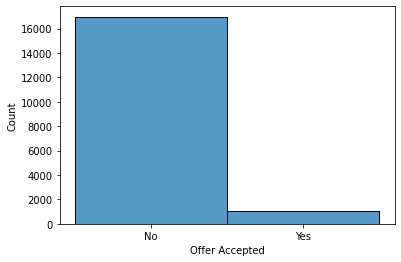

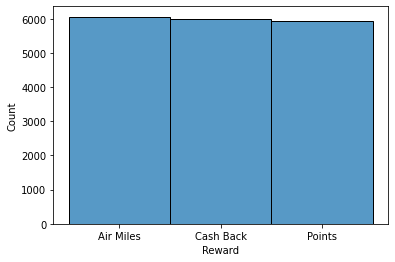

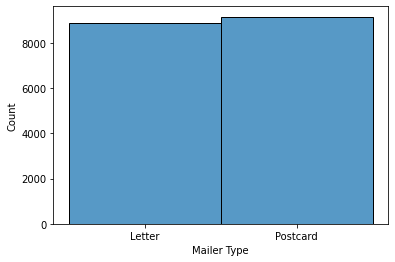

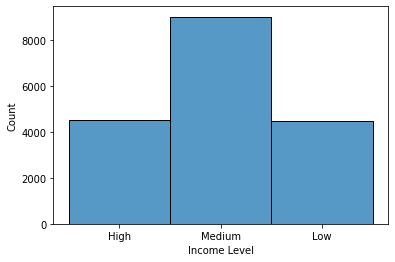

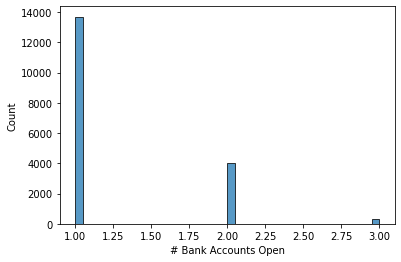

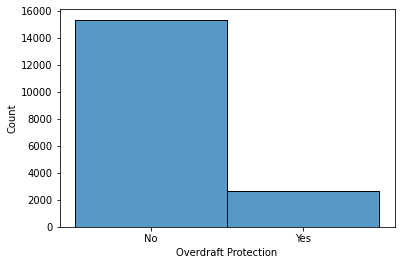

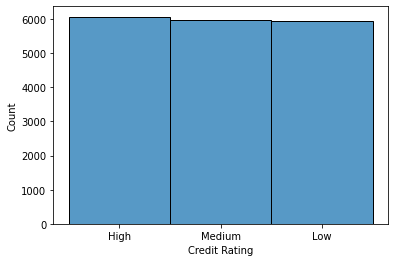

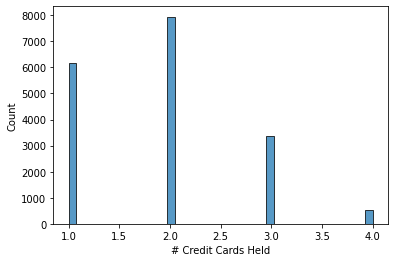

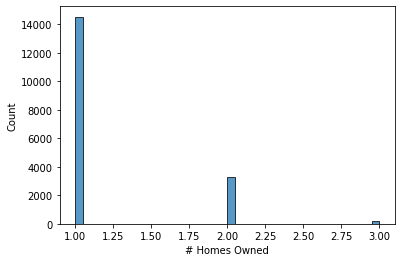

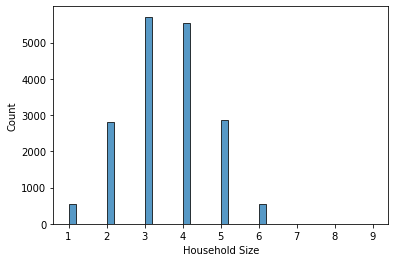

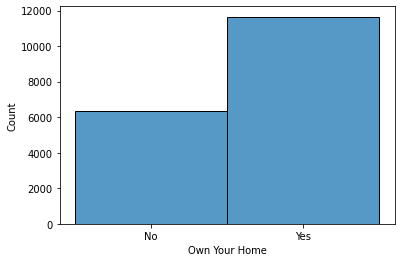

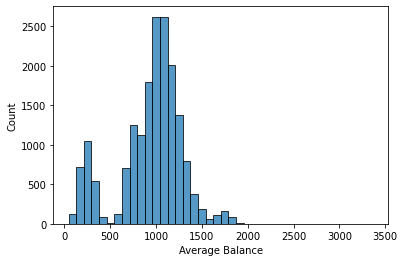

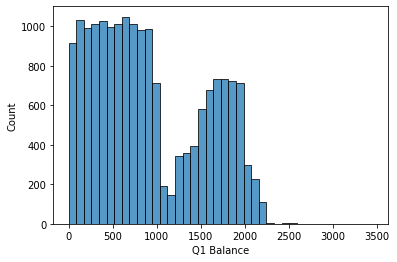

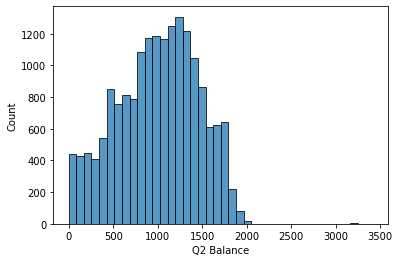

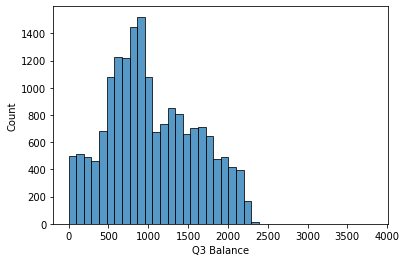

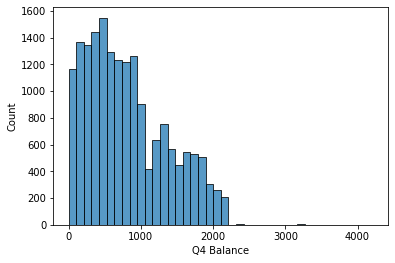

In [16]:
for i in range(data.shape[1]):
    sns.histplot(data[data.columns[i]], bins=40)
    plt.show()

In [17]:
# imblance in the target variable
data["Offer Accepted"].value_counts()

No     16977
Yes     1023
Name: Offer Accepted, dtype: int64

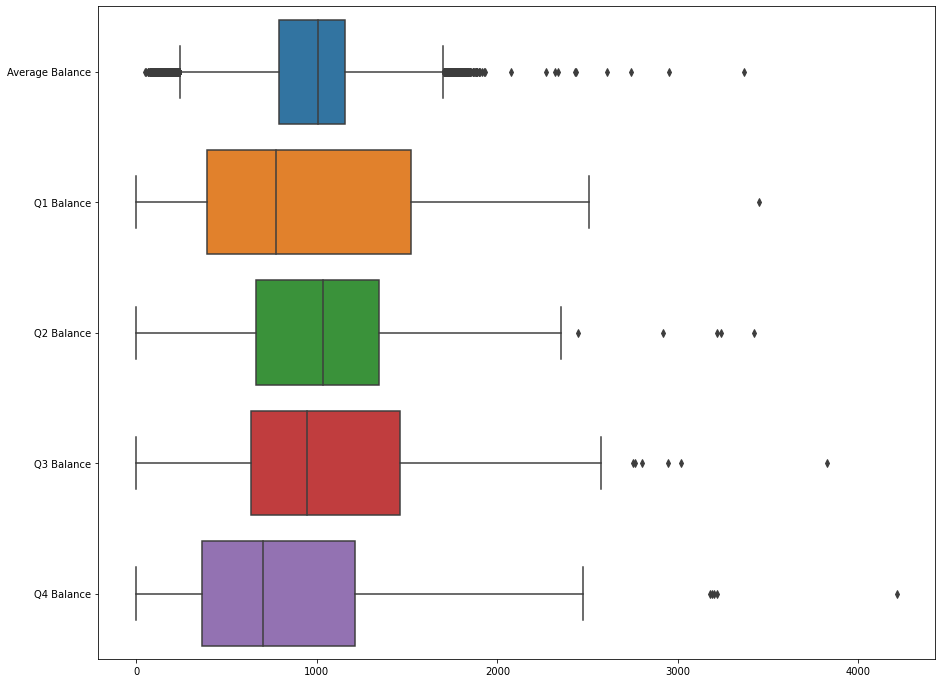

In [18]:
# Draw a boxplot for each numeric variable
plt.figure(figsize=(15,12))
ax = sns.boxplot(data=data.select_dtypes(include=[np.float64]), orient="h")

#### Cleaning column headers


In [19]:
def clean_columns(x):
    if x[0] == '#':
        x = x[2:].lower().strip().replace(' ', '_')
    else:
        x = x.lower().strip().replace(' ', '_')
    return x

data.columns = list(map(clean_columns, data.columns))
data.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'bank_accounts_open', 'overdraft_protection', 'credit_rating',
       'credit_cards_held', 'homes_owned', 'household_size', 'own_your_home',
       'average_balance', 'q1_balance', 'q2_balance', 'q3_balance',
       'q4_balance'],
      dtype='object')

#### Checking for and replacing null values

In [20]:
data.isnull().sum()/len(data)*100

offer_accepted          0.000000
reward                  0.000000
mailer_type             0.000000
income_level            0.000000
bank_accounts_open      0.000000
overdraft_protection    0.000000
credit_rating           0.000000
credit_cards_held       0.000000
homes_owned             0.000000
household_size          0.000000
own_your_home           0.000000
average_balance         0.133333
q1_balance              0.133333
q2_balance              0.133333
q3_balance              0.133333
q4_balance              0.133333
dtype: float64

In [21]:
# Replace null values with the median
for i in data[["average_balance", "q1_balance", "q2_balance", "q3_balance", "q4_balance"]].columns: #choose the columns with null values
    med = data[i].median()
    data[i] = data[i].fillna(med)

In [22]:
#"max" correlates strongly with avg balance and range so remove
#data_clean = data_clean.drop(["max"], axis = 1)

In [24]:
#export cleaned data to csv
data.to_csv('data_clean.csv', index=False)